<a href="https://colab.research.google.com/github/sonovman/GNN-from-scratch/blob/main/Part2_GNN_Experiment_KarateClub_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Think Graph Neural Networks (GNN) are hard to understand?**

**Think Graph Neural Networks (GNN) are hard to understand?**

**Part 2** (https://youtu.be/VDzrvhgyxsU):
-----------------------------
- Graph representations 
- Adjacency Matrix
- Feature Matrix
- Incidence Matrix
- Degree Matrix
- Laplacian Matrix 
- Bag of Nodes
- Node Embedding and Node Embedding Space
- Applying Convolution to Graph similar to Image
- Message Passing
- Understanding Graph Datasets available in PyG
- Node Classification using MLP & GNN
- NetworkX and tSNE visualization of Graphs
- GNN Explainer

**Google colab notebooks** 
https://github.com/prodramp/DeepWorks/tree/main/GraphNeuralNetworks

**Part 2 PDF document:**
https://github.com/prodramp/DeepWorks/blob/main/GraphNeuralNetworks/Graph%20Neural%20Networks%20-%20Part2.pdf

##**[사전학습 강추 러퍼런스]**


[Understanding Convolutions on Graphs, Understanding the building blocks and design choices of graph neural networks](https://distill.pub/2021/understanding-gnns/)

[A Gentle Introduction to Graph Neural Networks, Neural networks have been adapted to leverage the structure and properties of graphs](https://distill.pub/2021/gnn-intro/)

# **GNN Explaination:**
The explaination in this notebook is based on the GNNN example from the PyG documentation
https://pytorch-geometric.readthedocs.io/en/latest/notes/colabs.html
- Introduction: Hands-on Graph Neural Networks

In [1]:
!python --version

Python 3.7.15


In [1]:
!python -c "import torch; print(torch.version.cuda)"

11.3


In [2]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

1.12.1+cu113


In [3]:
# Install required packages.
#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# version matching
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-geometric


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 3.5 MB 34.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 8.9 MB 30.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 30.0 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=46e5ba2738a0c501efcf225c023c404deb415179af0dfdf5fd20745b71b2d9c8
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric


In [4]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
from torch_geometric.datasets import KarateClub

In [6]:
dataset = KarateClub()

In [7]:
data = dataset[0]  # Get the first graph object.
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


# **Train Mask**
- (4) There also exists an additional attribute called train_mask, which describes for which nodes we already know their community assigments. 

In [8]:
data.stores

[{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

In [9]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [10]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

Above only 4 nodes have mask value set as True, it means only 4 out of 34 nodes have community or class assignment, rest of the 30 nodes needs community assignment. 위의 노드 4개만 마스크 값이 True로 설정되어 있으며, 이는 34개 노드 중 4개 노드만 커뮤니티 또는 클래스 할당이 있으며, 나머지 30개 노드는 커뮤니티 할당이 필요하다는 것을 의미한다.

Train Mask -> In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes. 훈련 마스크 -> 총 4개 노드(각 커뮤니티당 1개)의 지상 실측 레이블만 알고 있으며, 나머지 노드에 대한 커뮤니티 할당을 추론하는 것이 과제이다.

# **Validation and Test Mask:**

If the graph holds the additional attributes i.e. val_mask and test_mask, which denotes which nodes should be used for validation and testing.

그래프에 유효성 검사 및 테스트에 사용해야 하는 노드를 나타내는 val_mask 및 test_mask와 같은 추가 속성이 포함되어 있는 경우.

# **GNN Objective:**
- We have 4 nodes only with the community assigned so we need to assign remaining 30 nodes 커뮤니티가 할당된 노드만 4개라 나머지 30개 노드를 할당해야 합니다.

## **Implementing Graph Neural Networks**

After learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will use on of the most simple GNN operators, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)), which is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

With this, we are ready to create our first Graph Neural Network by defining our **network architecture in a torch.nn.Module class**:

In [12]:
#class GCN(torch.nn.Module):

- Here, we first initialize all of our building blocks in `__init__` and define the computation flow of our network in `forward`. 먼저 '_init__'에서 모든 빌딩 블록 빌딩을 초기화하고 네트워크의 전방향 계산 흐름을 정의한다.

In [11]:
#  def __init__(self):

#  def forward(self, x, edge_index):

- We first define and stack **three graph convolution layers**, which corresponds to aggregating 3-hop neighborhood information around each node (all nodes up to 3 "hops" away). 먼저 각 노드(최대 3 "홉" 떨어진 모든 노드) 주변의 3-홉 이웃 정보를 집계하는 것에 해당하는 3개의 그래프 컨볼루션 레이어를 정의하고 쌓는다.

- In addition, the `GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity. 추가로 'GCConv' 층은 노드 특성 차원을 $2$, 즉 $34 \rightarrow 4 \rightarrow 2$로 감소시킨다. 각 'GCConv' 레이어는 비선형[tanh]에 의해 활성화 강화된다.

In [ ]:
#        self.conv1 = GCNConv(dataset.num_features, 4)
#        self.conv2 = GCNConv(4, 4)
#        self.conv3 = GCNConv(4, 2)
#        self.classifier = Linear(2, dataset.num_classes)

In [ ]:
#    def forward(self, x, edge_index):
#        h = self.conv1(x, edge_index)
#        h = h.tanh()
#        h = self.conv2(h, edge_index)
#        h = h.tanh()
#        h = self.conv3(h, edge_index)
#        h = h.tanh()  # Final GNN embedding space.

- After that, we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities. 그 후, 노드를 4개의 클래스/커뮤니티 중 1개에 매핑하는 분류기 역할을 하는 단일 선형 변환(['torch_nn_Linear])을 적용한다.


- We return both the output of the final classifier as well as the final node embeddings produced by our GNN. 우리는 GNN에 의해 생성된 최종 노드 임베딩뿐만 아니라 최종 분류기의 출력을 모두 반환한다.


- We proceed to initialize our final model via `GCN()`, and printing our model produces a summary of all its used sub-modules. 우리는 'GCN()'을 통해 최종 모델을 초기화하고 모델을 인쇄하여 사용된 모든 하위 모듈의 요약을 생성한다.

In [13]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


### Embedding the Karate Club Network

Let's take a look at the node embeddings produced by our GNN.
우리의 GNN에 의해 생성된 노드 임베딩을 살펴보자.

Here, we pass in the initial node features `x` and the graph connectivity information `edge_index` to the model, and visualize its 2-dimensional embedding.
여기서 우리는 초기 노드 특징 'x'와 그래프 연결 정보 'edge_index'를 모델에 전달하고 2차원 임베딩을 시각화한다.

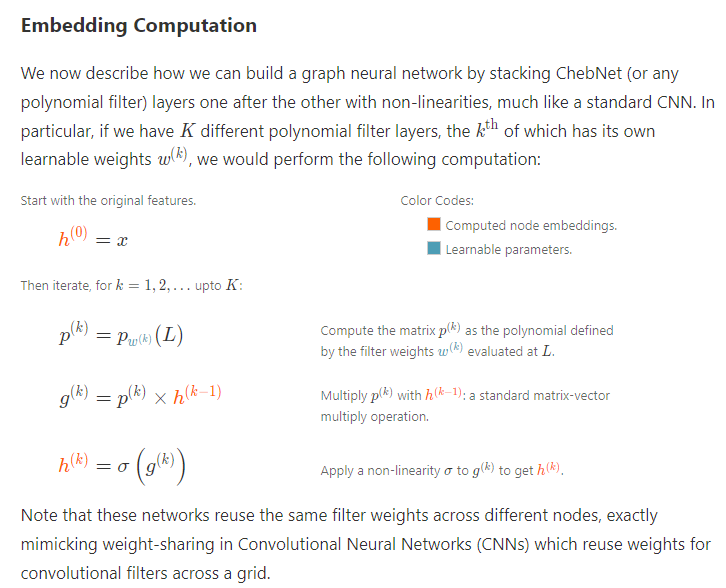

In [14]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

Embedding shape: [34, 2]


In [15]:
h

tensor([[ 0.0962,  0.0115],
        [ 0.0235,  0.0129],
        [ 0.0432,  0.0201],
        [ 0.0401,  0.0162],
        [ 0.0522, -0.0054],
        [ 0.0775,  0.0011],
        [ 0.0763,  0.0031],
        [ 0.0300,  0.0131],
        [ 0.0107,  0.0181],
        [ 0.0014,  0.0195],
        [ 0.0575, -0.0035],
        [ 0.0867,  0.0090],
        [ 0.0353,  0.0106],
        [ 0.0242,  0.0179],
        [-0.0114,  0.0138],
        [-0.0109,  0.0173],
        [ 0.0740,  0.0046],
        [ 0.0188,  0.0012],
        [-0.0139,  0.0210],
        [ 0.0068,  0.0108],
        [ 0.0077,  0.0168],
        [ 0.0014,  0.0033],
        [-0.0065,  0.0175],
        [ 0.0657,  0.0242],
        [ 0.1390,  0.0069],
        [ 0.1296,  0.0110],
        [-0.0140,  0.0309],
        [ 0.0852,  0.0189],
        [ 0.0415,  0.0141],
        [ 0.0032,  0.0333],
        [-0.0036,  0.0152],
        [ 0.0995,  0.0135],
        [ 0.0102,  0.0337],
        [ 0.0181,  0.0381]], grad_fn=<TanhBackward0>)

In [16]:
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(12,8))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [17]:
from sklearn.manifold import TSNE

def visualize_tsne(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [18]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

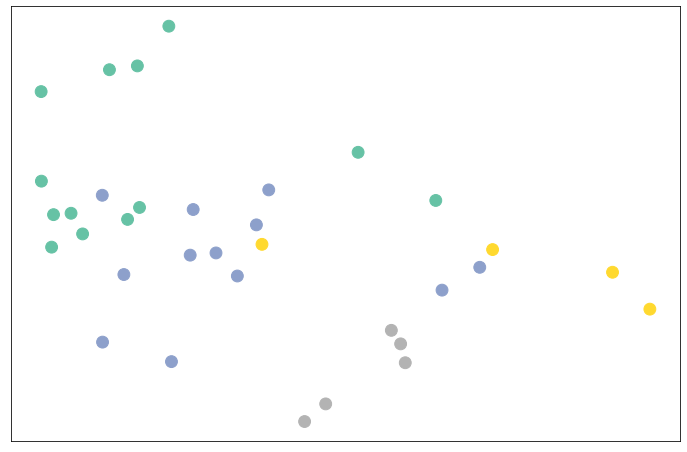

In [19]:
visualize_embedding(h, color=data.y)
# Note : 4 classes are visible
# Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized completely at random

Remarkably, even before training the weights of our model, the model produces an embedding of nodes that closely resembles the community-structure of the graph. 놀랍게도, 모델의 가중치를 훈련하기 전에도 모델은 그래프의 커뮤니티 구조와 매우 유사한 노드의 임베딩을 생성한다.


Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized **completely at random** and we have not yet performed any training so far!
모델의 가중치가 무작위로 완전히 초기화되고 아직까지 어떤 훈련도 수행하지 않았지만, 동일한 색상(커뮤니티)의 노드는 이미 임베딩 공간에서 함께 밀접하게 클러스터링되어 있다.


This leads to the conclusion that GNNs introduce a strong inductive bias, leading to similar embeddings for nodes that are close to each other in the input graph. 이는 GNN이 강력한 유도 편향을 도입하여 입력 그래프에서 서로 가까운 노드에 대한 유사한 임베딩으로 이어진다는 결론으로 이어진다.


# **Embedding Computation**

[Distill_Understanding Convolutions on Graphs](https://distill.pub/2021/understanding-gnns/)

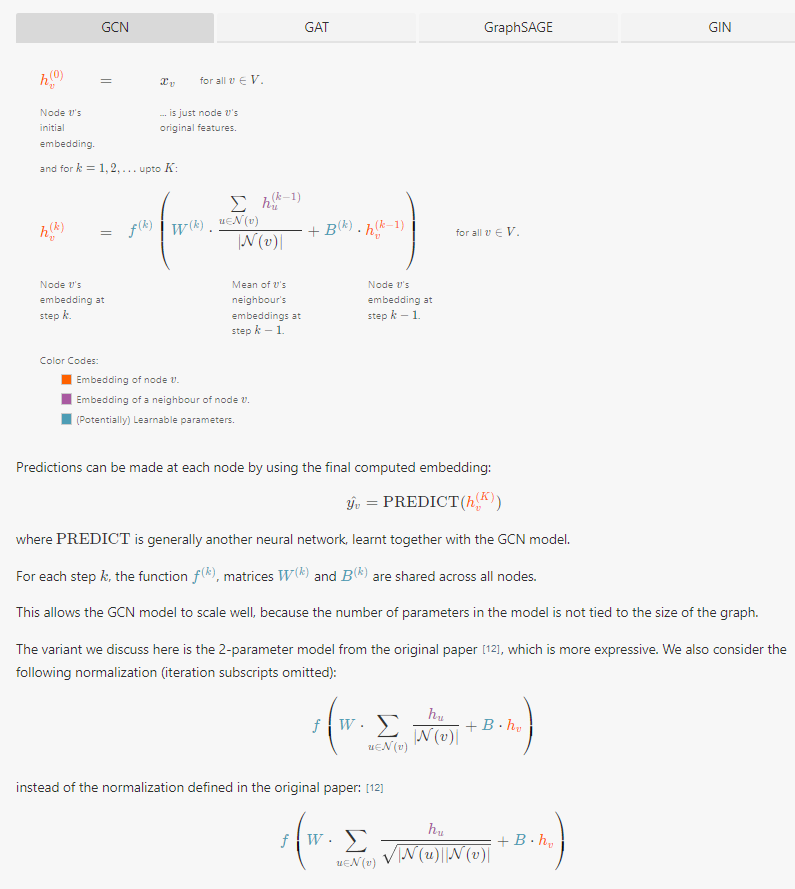

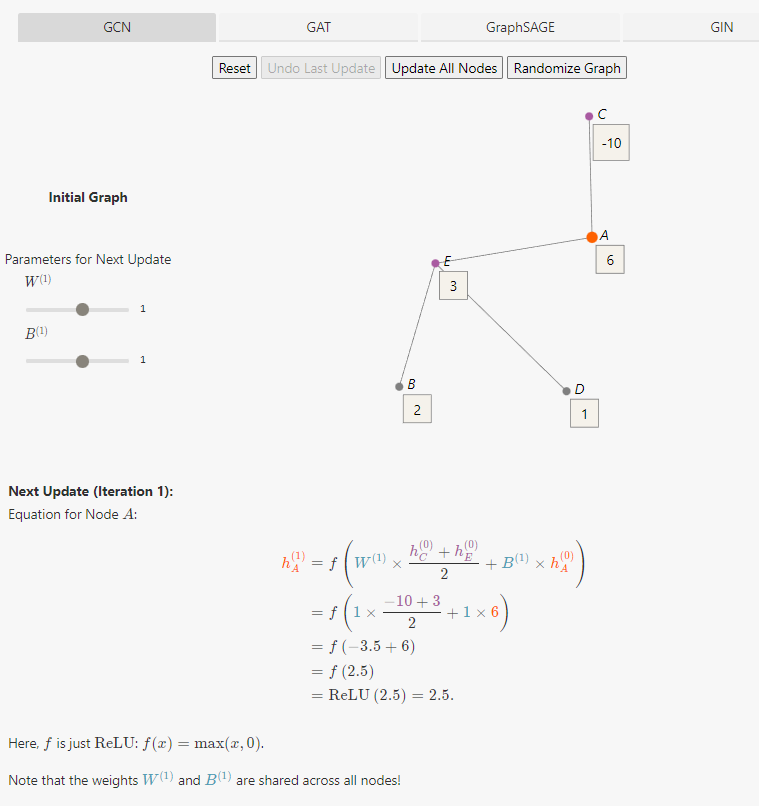

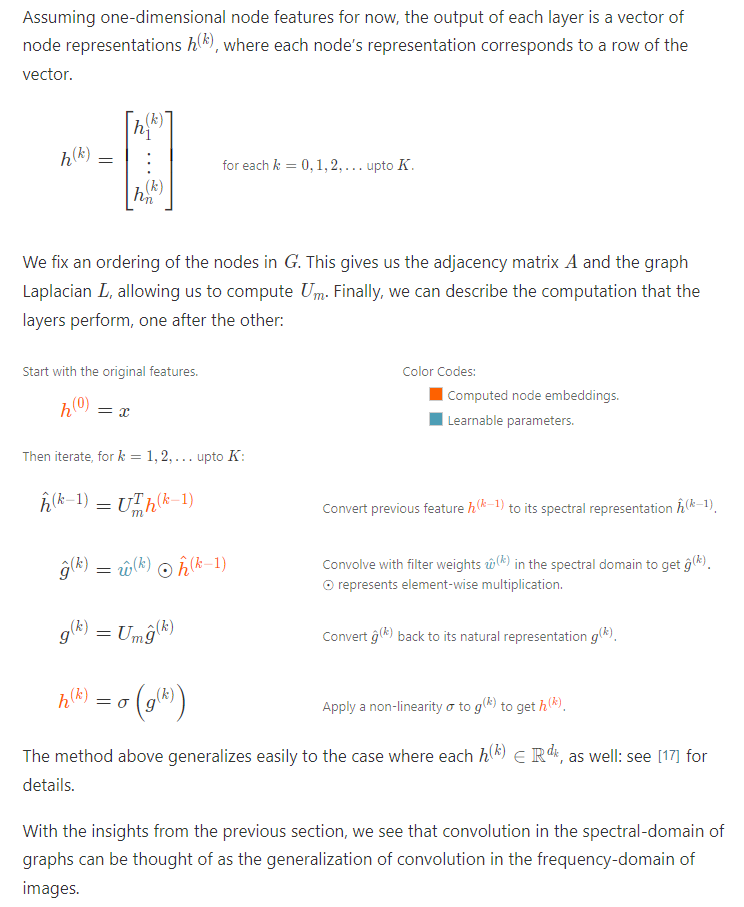

# **Training on the Karate Club Network**

But can we do better? Let's look at an example on how to train our network parameters based on the knowledge of the community assignments of 4 nodes in the graph (one for each community): 하지만 우리가 더 잘할 수 있을까? 그래프에서 4개 노드의 커뮤니티 할당에 대한 지식을 기반으로 네트워크 매개 변수를 교육하는 방법에 대한 예를 살펴보겠습니다(각 커뮤니티에 대해 하나씩).

Since everything in our model is differentiable and parameterized, we can add some labels, train the model and observse how the embeddings react. 모델의 모든 것이 차별화되고 매개 변수화되므로 레이블을 추가하고 모델을 훈련하며 임베딩이 어떻게 반응하는지 관찰할 수 있다.


Here, we make use of a semi-supervised or transductive learning procedure: We simply train against one node per class, but are allowed to make use of the complete input graph data. 여기서, 우리는 준지도 또는 전도성 학습 절차를 사용한다. 우리는 단순히 클래스당 하나의 노드에 대해 훈련하지만, 전체 입력 그래프 데이터를 사용할 수 있다.


Training our model is very similar to any other PyTorch model.


In addition to defining our network architecture, we define a loss critertion (here, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) and initialize a stochastic gradient optimizer (here, [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).


After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass. 그 후, 우리는 여러 라운드의 최적화를 수행하며, 여기서 각 라운드는 순전파 패스와 역전파 패스로 구성되어 순전파 패스에서 파생된 손실에 대한 모델 매개 변수의 그레이디언트를 계산한다.


If you are not new to PyTorch, this scheme should appear familar to you. 
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Note that our semi-supervised learning scenario is achieved by the following line:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training nodes for computing the loss**.
모든 노드에 대한 노드 임베딩을 계산하는 동안 손실 계산에는 학습 노드만 사용한다.

Here, this is implemented by filtering the output of the classifier `out` and ground-truth labels `data.y` to only contain the nodes in the `train_mask`.
여기서 이것은 분류기 <out> 및 지상 실측 레이블 <data.y>의 출력을 필터링하여 <train_mask>의 노드만 포함함으로써 구현된다.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

In [20]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))


<IPython.core.display.Javascript object>

In [21]:
model = GCN()

In [22]:
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.

In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.


In [24]:
# added by me
final_h = h

In [25]:
def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

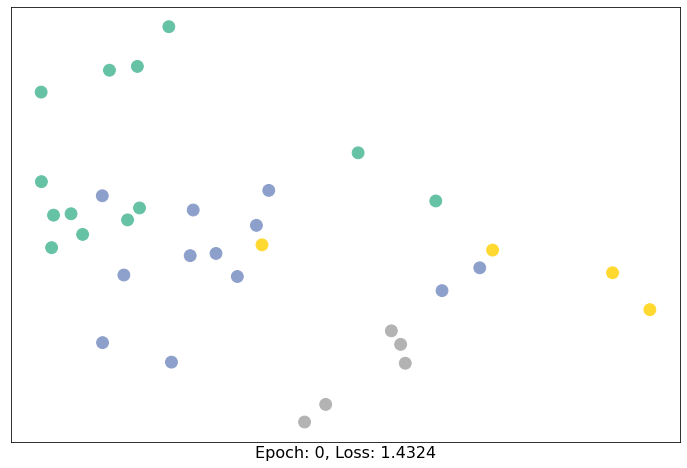

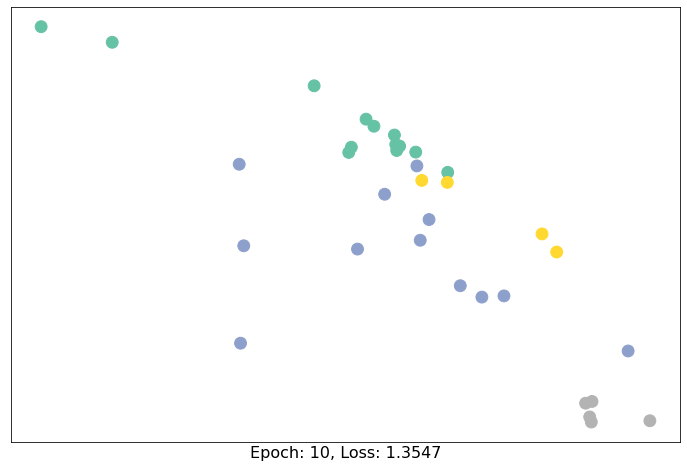

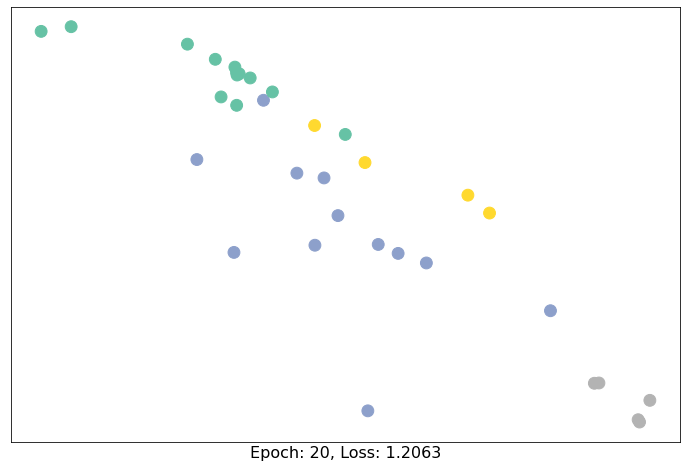

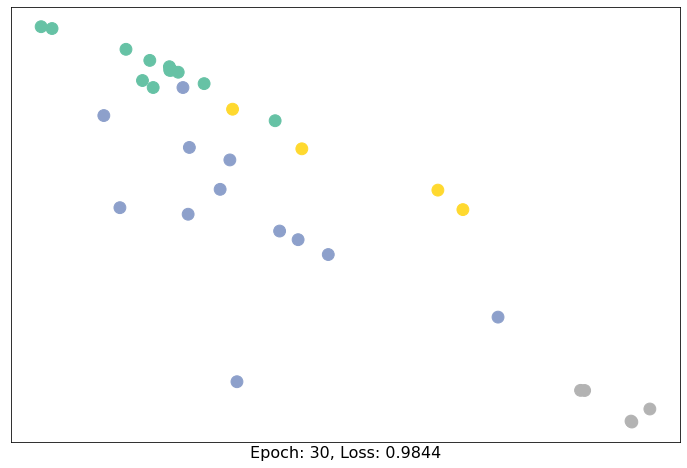

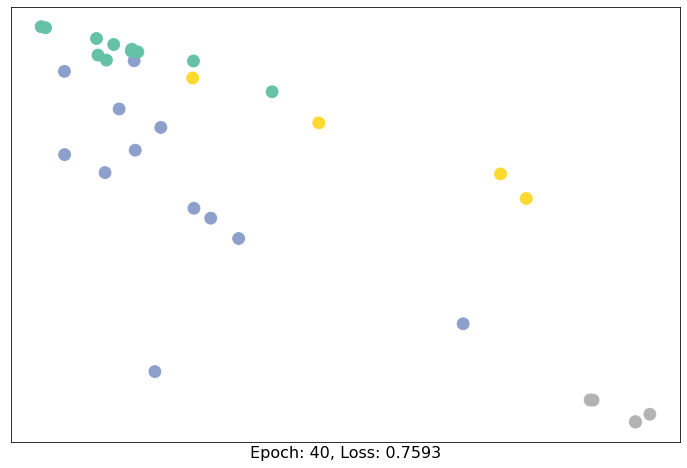

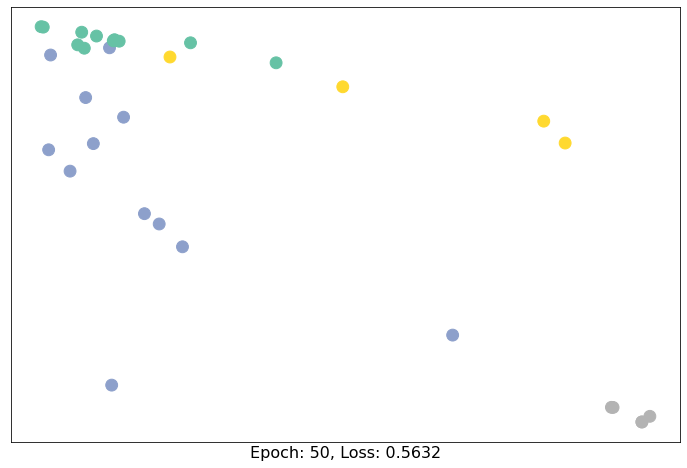

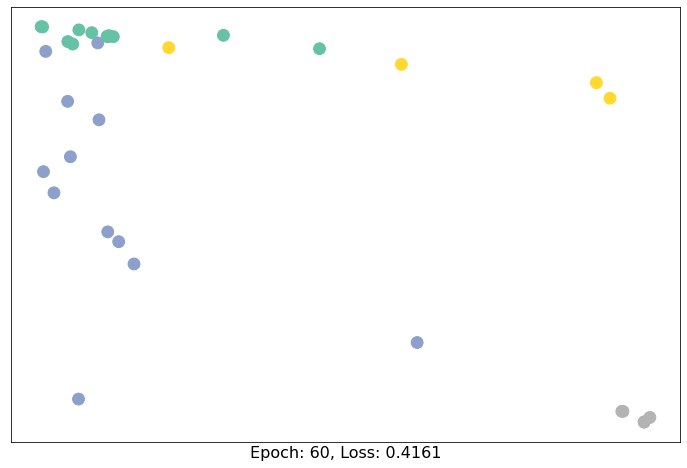

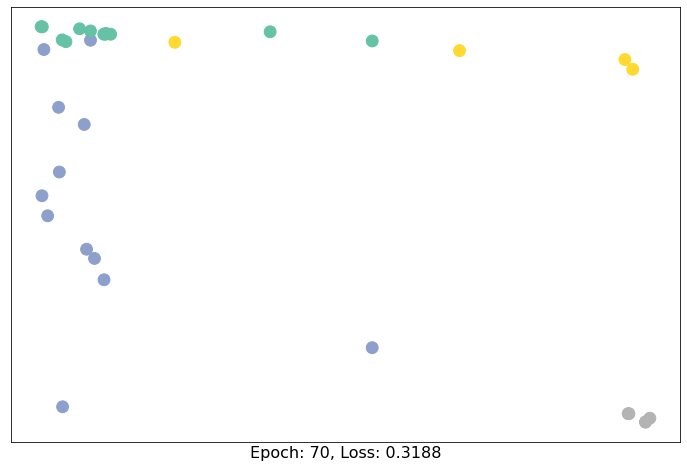

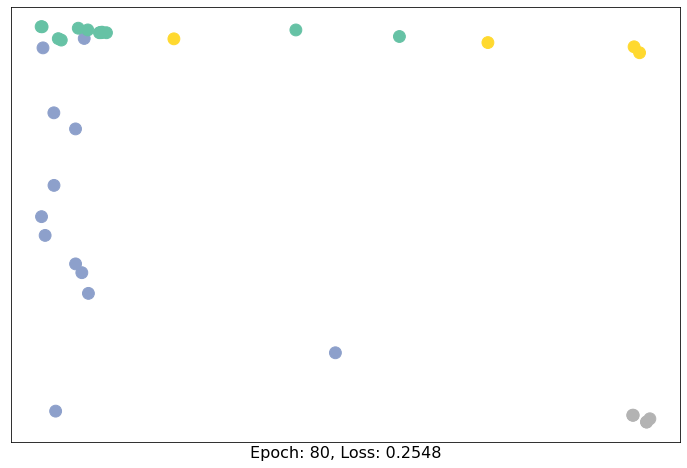

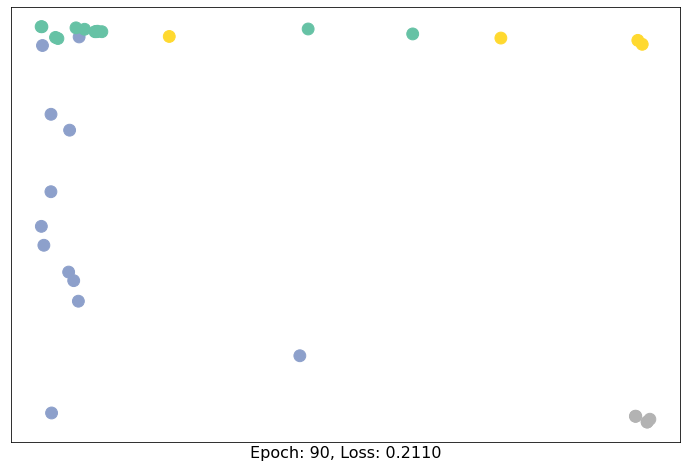

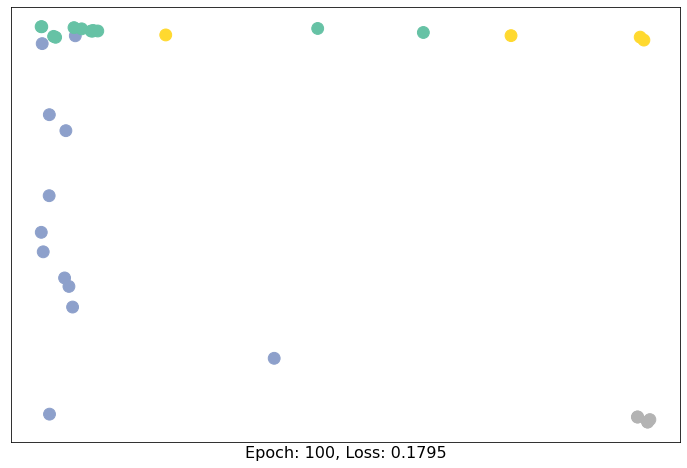

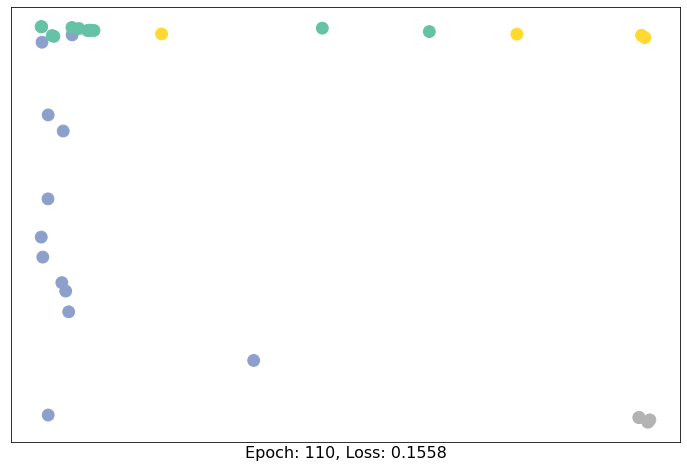

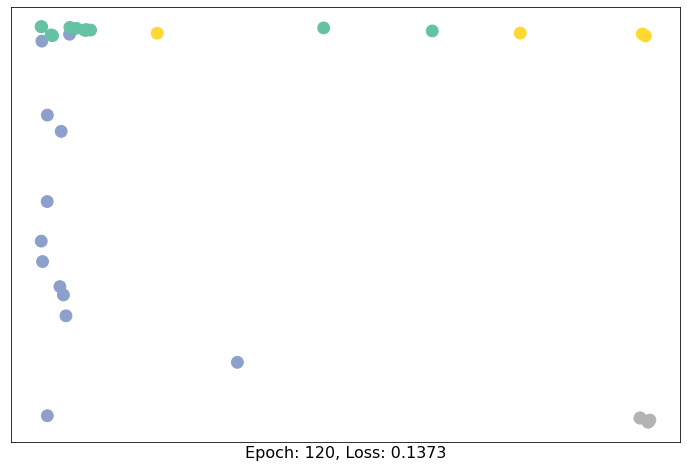

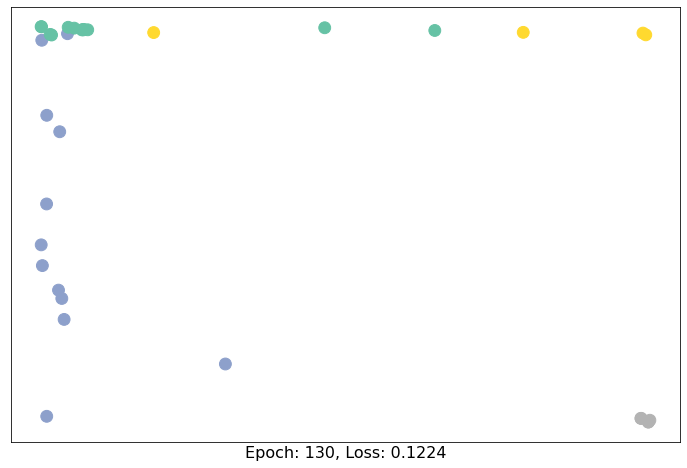

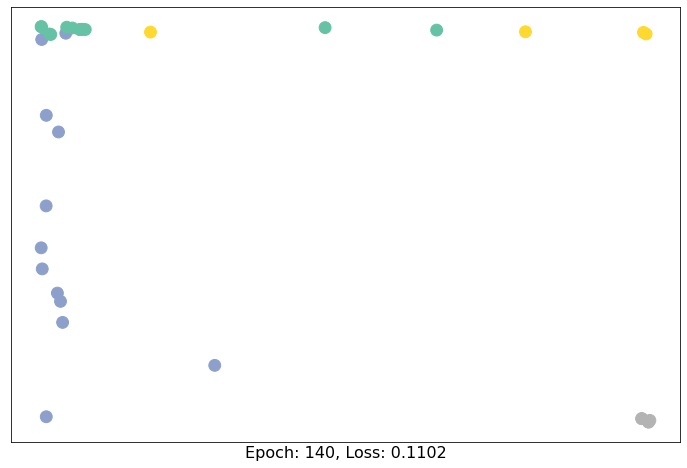

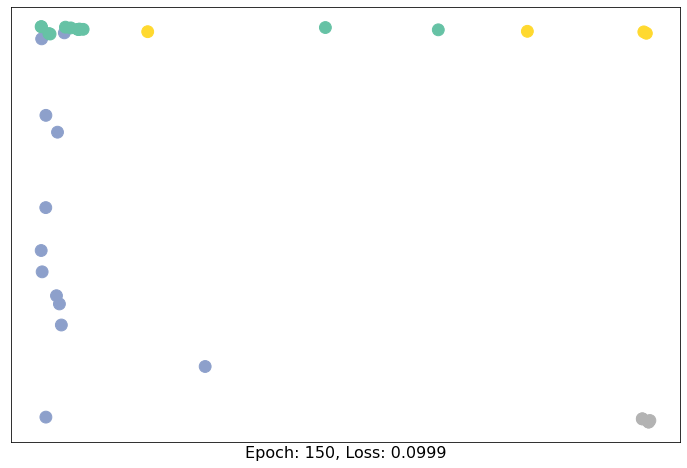

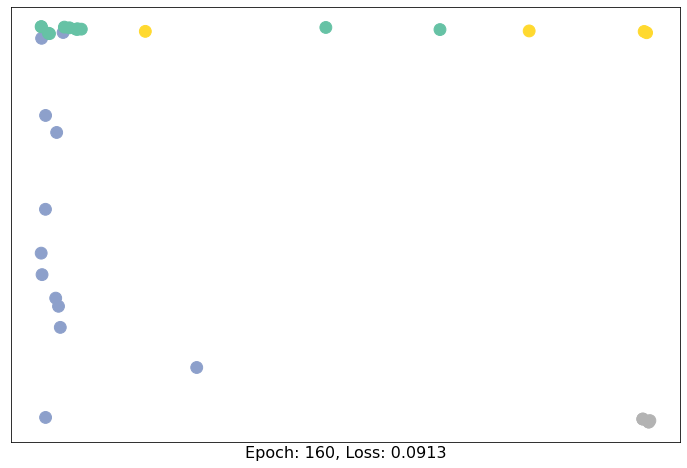

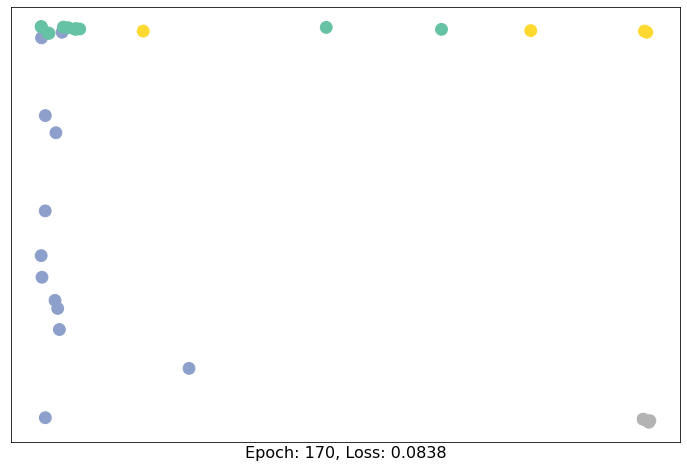

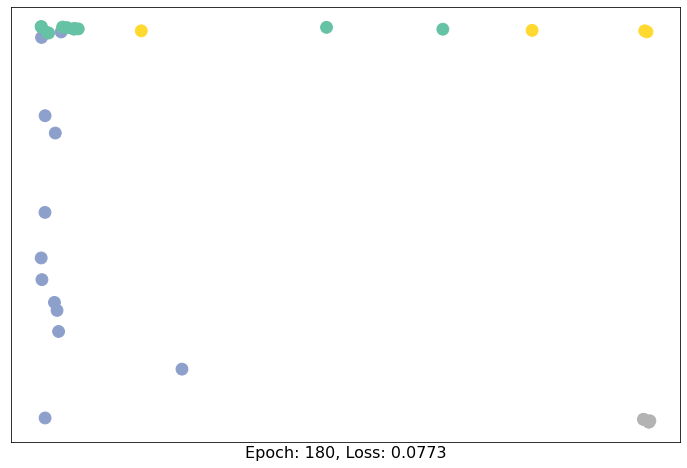

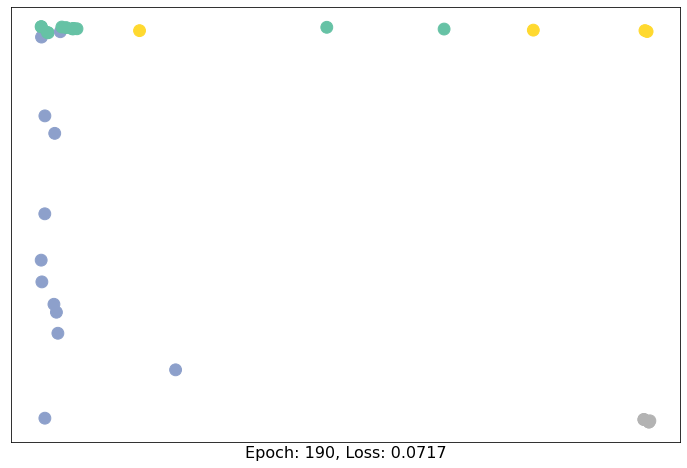

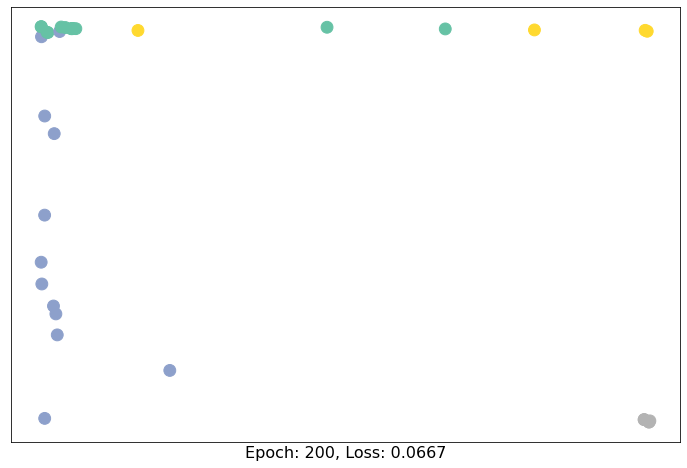

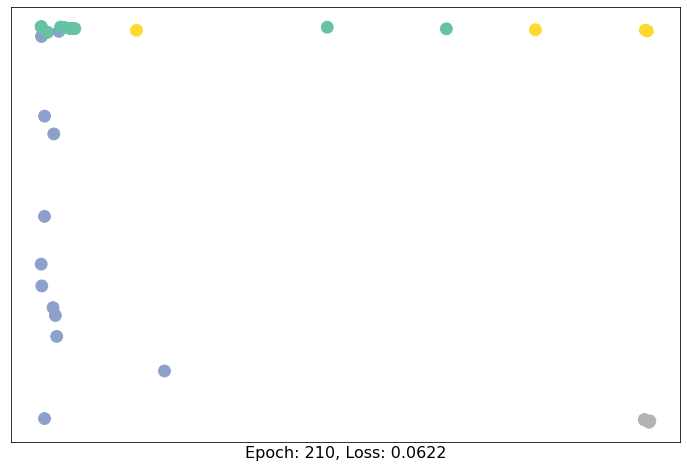

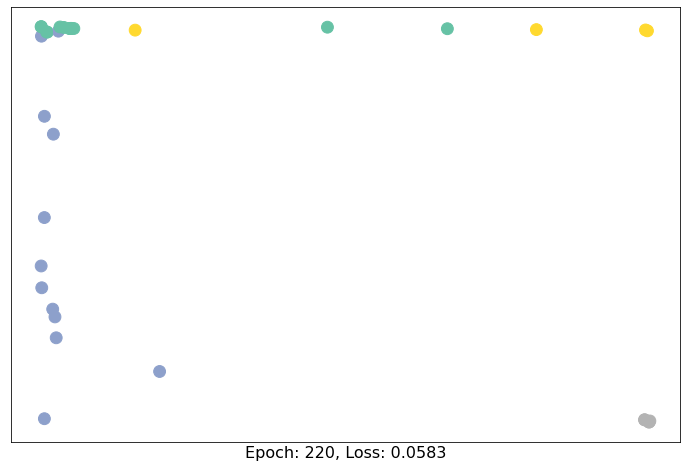

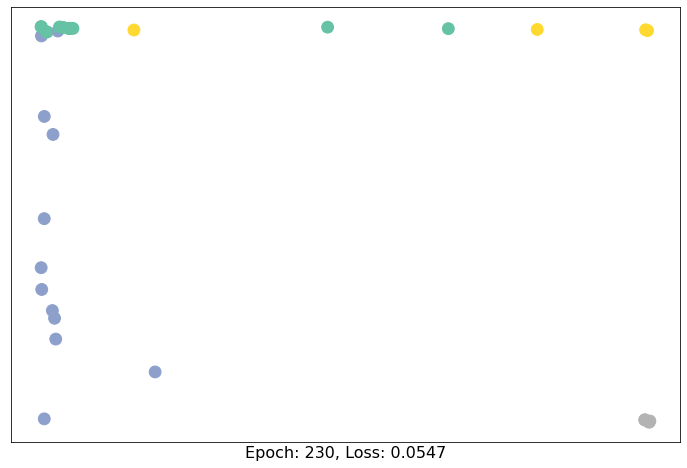

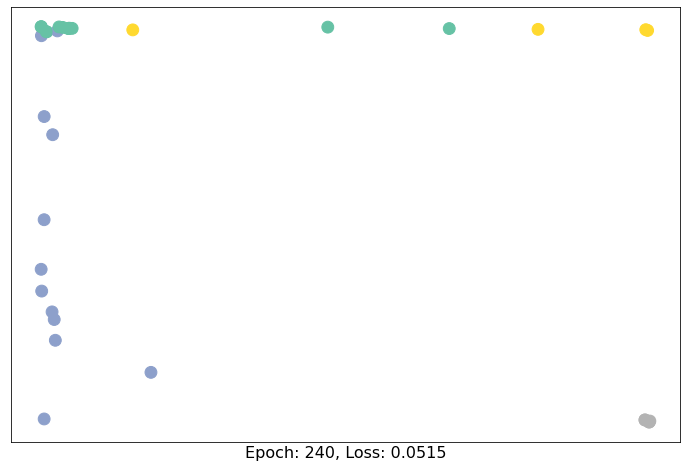

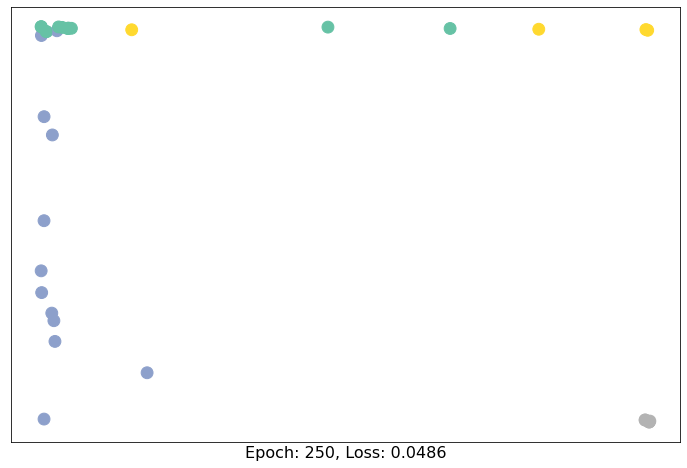

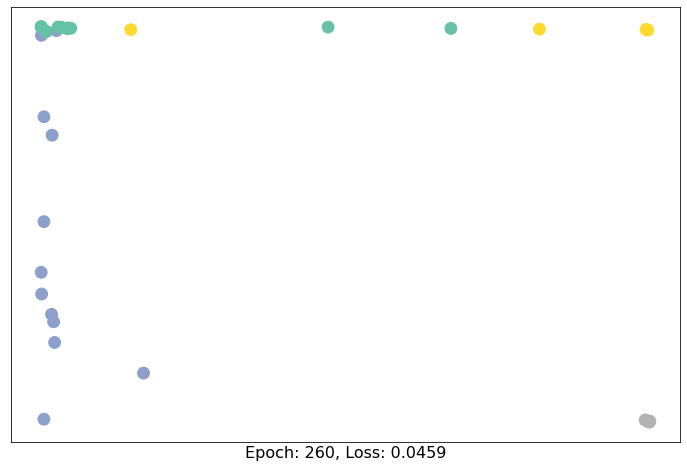

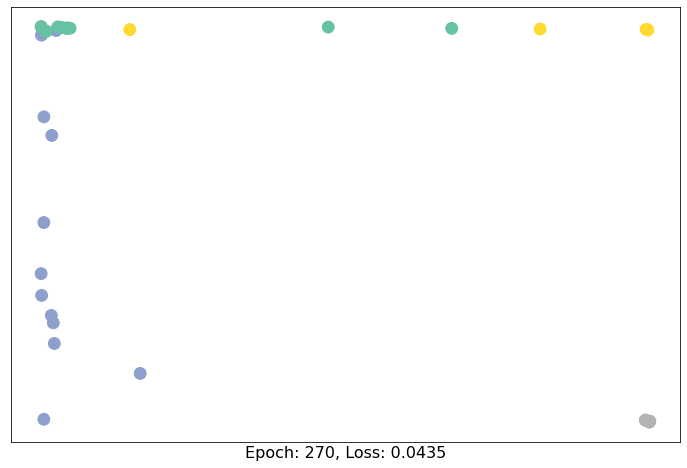

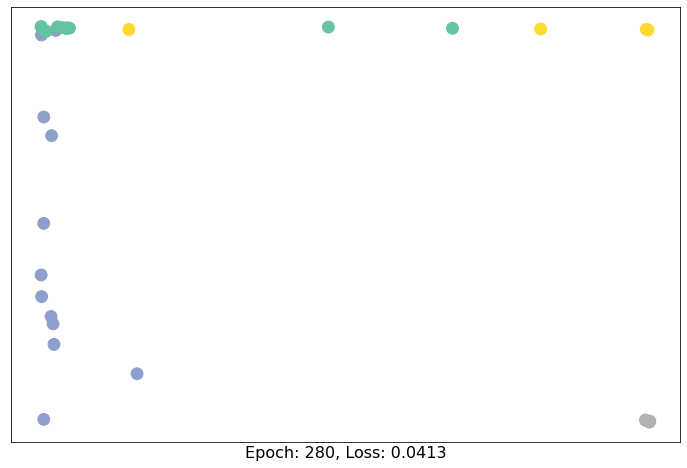

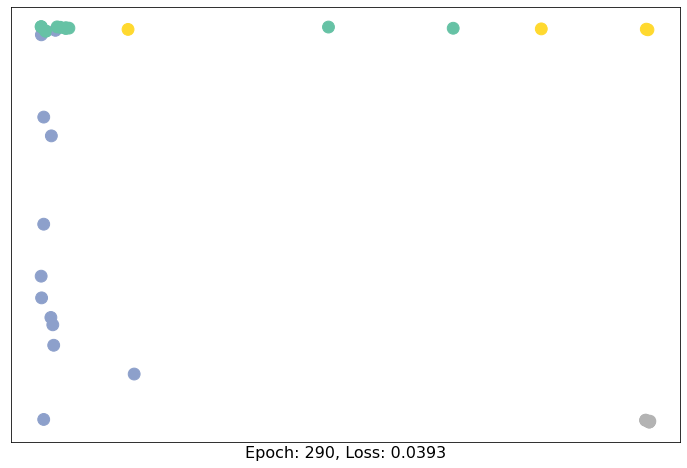

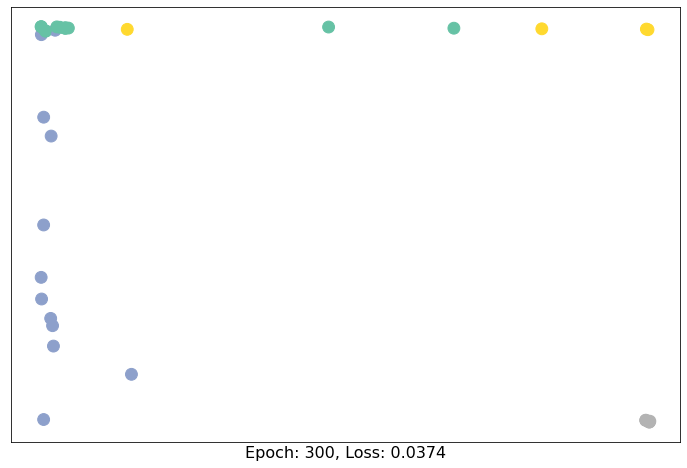

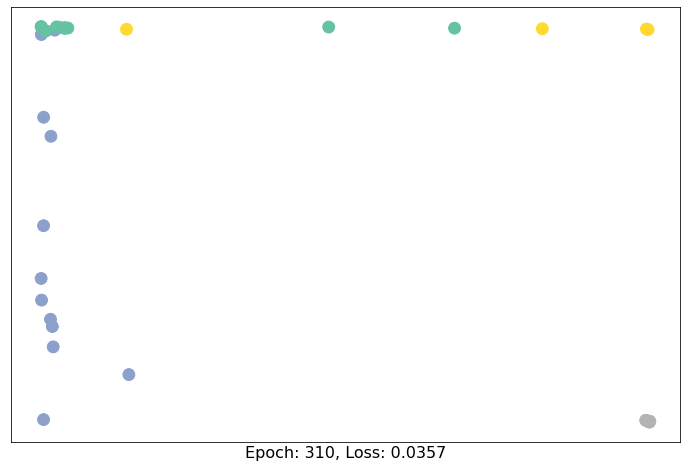

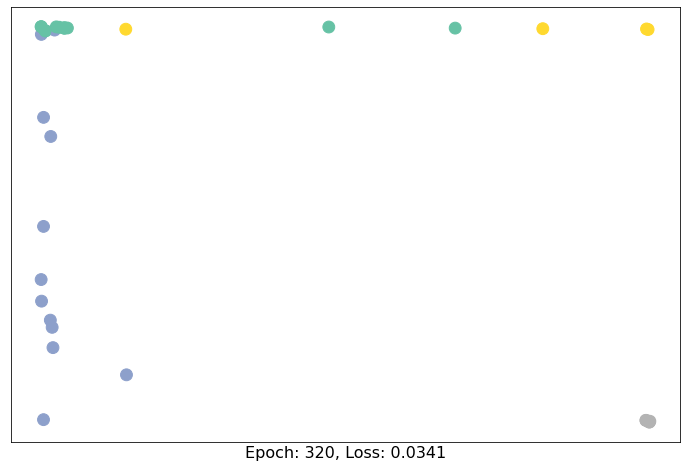

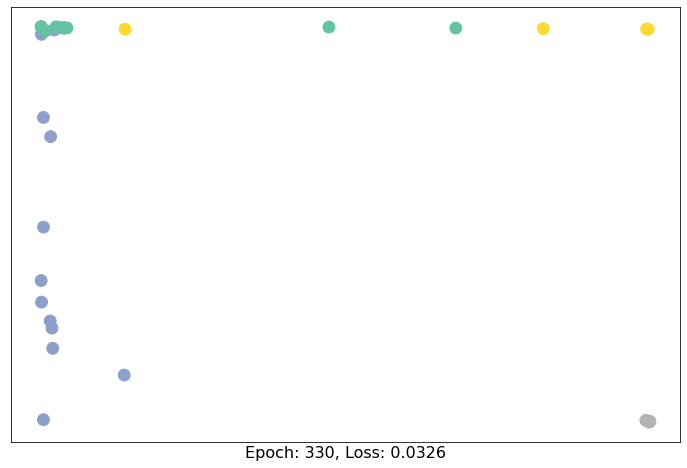

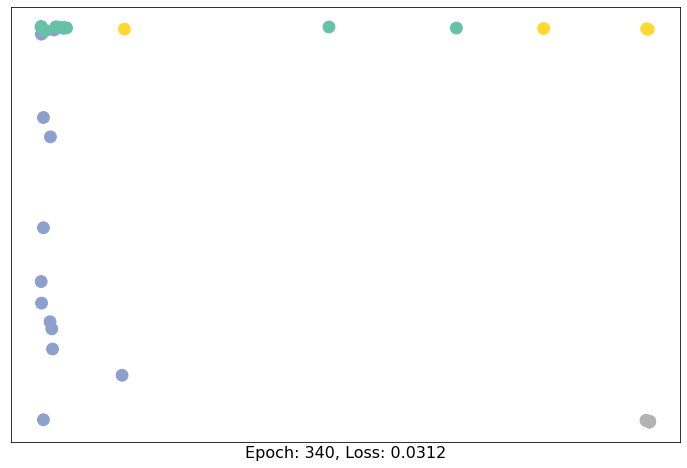

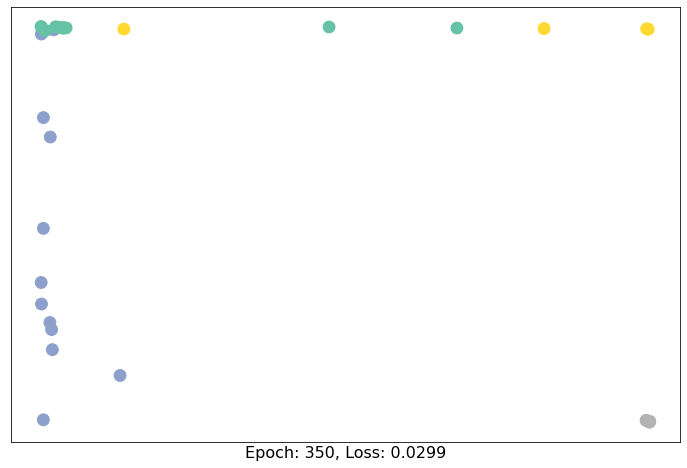

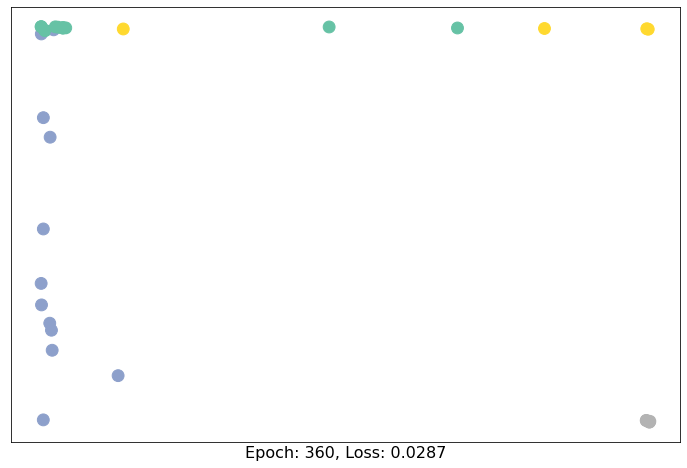

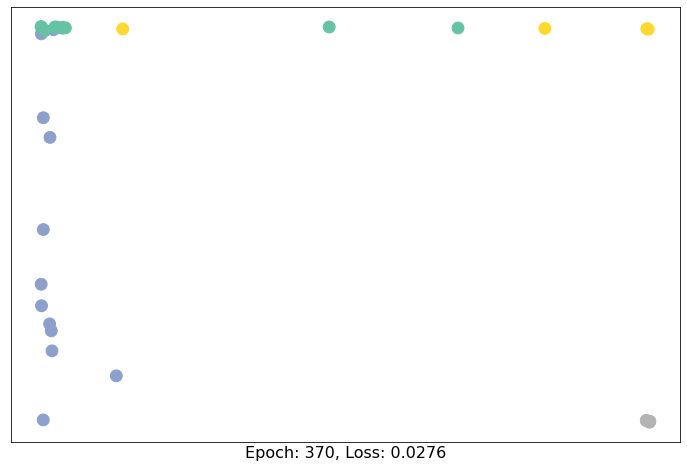

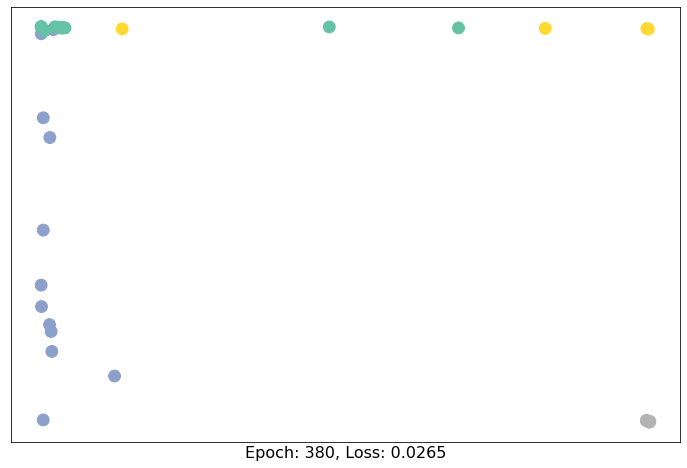

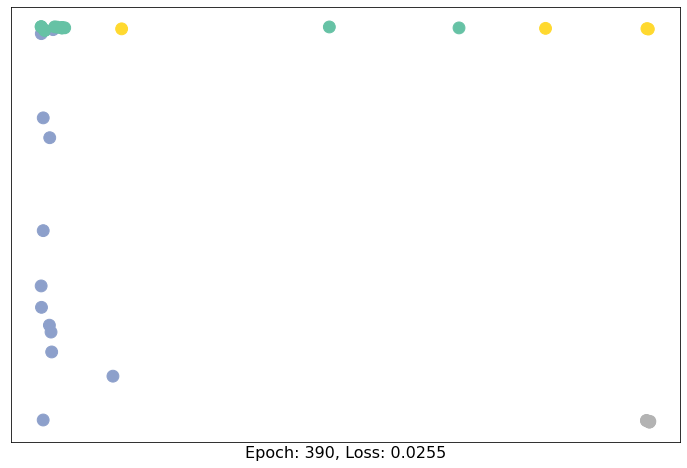

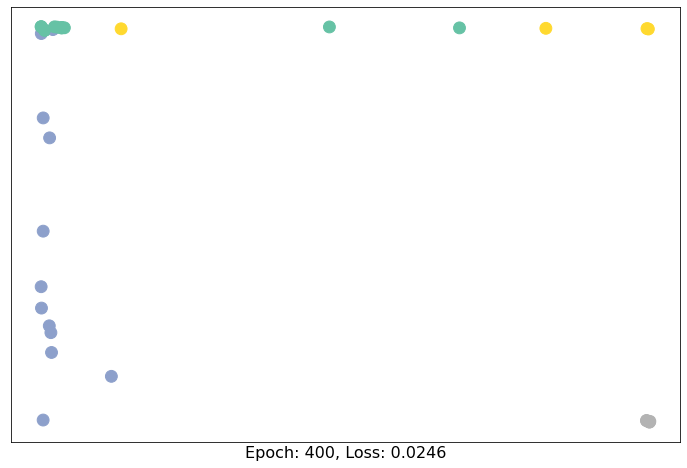

In [26]:
for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        ## Added by Me
        final_h = h

같은 노드 클래스(색깔)이 서로 군집되고 다른 클래스는 떨어져 있음

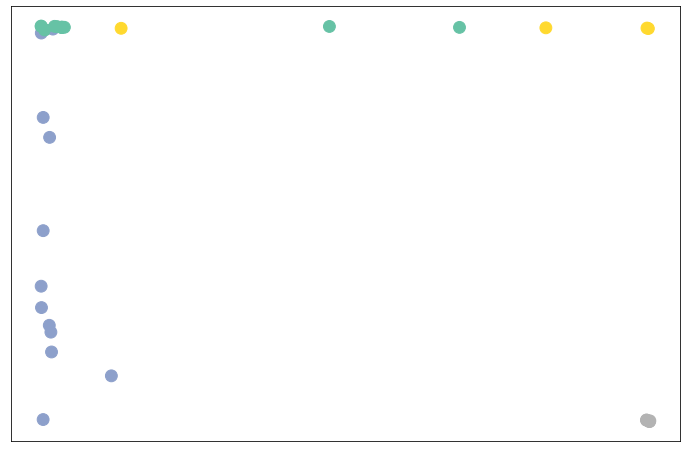

In [28]:
visualize_embedding(h, color=data.y) # 마지막 결과

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


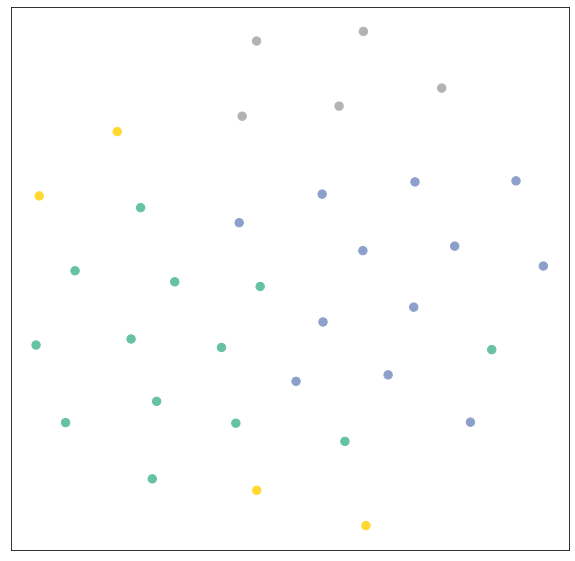

In [30]:
visualize_tsne(h, color=data.y) #

t-distributed stochastic neighbor embedding 소위 t-SNE라고 불리는 방법은 높은 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법입니다. 낮은 차원 공간의 시각화에 주로 사용하며 차원 축소할 때는 비슷한 구조끼리 데이터를 정리한 상태이므로 데이터 구조를 이해하는 데 도움을 줍니다.
t-SNE를 사용하면 높은 차원 공간에서 비슷한 데이터 구조는 낮은 차원 공간에서 가깝게 대응하며, 비슷하지 않은 데이터 구조는 멀리 떨어져 대응됩니다.

# **Result:**
The 3-layer GCN model manages to **linearly separating** the communities and **classifying** most of the nodes correctly.

In [31]:
model.eval()
out = model(data.x, data.edge_index)
out

(tensor([[-0.2345,  4.3591, -4.4310,  0.1436],
         [ 1.3456,  2.8111, -2.9429, -1.4126],
         [ 4.3243, -0.1533, -0.0824, -4.3379],
         [ 1.0921,  3.0593, -3.1815, -1.1629],
         [-3.9170,  0.8398,  0.6012,  5.0635],
         [-3.9515,  0.8397,  0.6091,  5.1036],
         [-3.9515,  0.8397,  0.6092,  5.1036],
         [ 1.9870,  2.1490, -2.2986, -2.0382],
         [ 4.3406, -0.2136, -0.0143, -4.3460],
         [ 4.3004, -0.2671,  0.0586, -4.2896],
         [-3.9173,  0.8395,  0.6016,  5.0639],
         [-0.1352,  3.4499, -3.3691,  0.1931],
         [ 0.5090,  3.5199, -3.5986, -0.5685],
         [ 3.3199,  0.8232, -1.0195, -3.3474],
         [ 4.2715, -0.3359,  0.1473, -4.2435],
         [ 4.2691, -0.3384,  0.1509, -4.2402],
         [-3.9464,  0.8293,  0.6204,  5.0996],
         [ 0.7460,  3.2917, -3.3801, -0.8026],
         [ 4.2662, -0.3436,  0.1577, -4.2359],
         [ 3.0462,  1.0192, -1.1912, -3.0647],
         [ 4.2517, -0.3553,  0.1749, -4.2169],
         [ 0.

Note: As we do not have test_mask so we can not check the acuracy of the graph to find what % of the node are correctly set into their correct class. test_mask가 없기 때문에 그래프의 정확도를 확인하여 노드의 몇 %가 올바른 클래스로 올바르게 설정되었는지 찾을 수 없습니다.

In [32]:
model.state_dict()

OrderedDict([('conv1.bias', tensor([-0.0398,  0.0074,  0.0530,  0.0303])),
             ('conv1.lin.weight',
              tensor([[ 0.9893, -0.6488, -0.6693, -0.0615,  0.6027,  1.1585,  0.7938, -0.3729,
                       -0.6079, -1.0193,  0.8887, -0.1473,  0.3653, -0.5545, -0.8042, -0.4079,
                        1.0150,  0.2699, -0.9723,  0.0088, -0.6479,  0.1900, -0.3529, -0.5920,
                        0.4493,  0.3951, -0.5013, -0.0678, -1.1910, -1.0785, -1.0772, -0.2185,
                       -0.6120, -0.6529],
                      [-1.0868, -1.3011,  0.2456, -0.7954, -0.4431, -0.2655, -0.8488, -1.2820,
                        0.0860,  0.4040, -0.9798, -0.7531, -1.0100, -0.8316,  0.4007,  0.5778,
                       -0.5675, -1.1067,  0.9949, -1.2402,  0.7423, -1.2624,  0.5717,  0.9572,
                        1.2723,  1.3687,  0.7043,  1.0436,  0.9128,  1.2223,  0.2289,  1.3794,
                        0.5734,  1.0791],
                      [-0.3226,  0.6576,  0.890

In [33]:
model.type

<bound method Module.type of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [35]:
#model.summary

AttributeError: ignored

In [36]:
model.share_memory

<bound method Module.share_memory of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [37]:
model.parameters

<bound method Module.parameters of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [38]:
model.get_parameter

<bound method Module.get_parameter of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [39]:
model.get_submodule

<bound method Module.get_submodule of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [40]:
torch.save(model.state_dict(), 'karate-club.h5')

In [41]:
torch.save(model, 'karate-club_full.h5')

In [42]:
!ls -lah /content

total 32K
drwxr-xr-x 1 root root 4.0K Nov 28 09:19 .
drwxr-xr-x 1 root root 4.0K Nov 28 08:15 ..
drwxr-xr-x 4 root root 4.0K Nov 22 00:13 .config
-rw-r--r-- 1 root root 8.1K Nov 28 09:19 karate-club_full.h5
-rw-r--r-- 1 root root 3.4K Nov 28 09:19 karate-club.h5
drwxr-xr-x 1 root root 4.0K Nov 22 00:14 sample_data
